##Метод звичайного градієнтного спуску (Batch Gradient Descent)

Цей метод є одним із базових алгоритмів оптимізації в машинному навчанні. У ньому параметри моделі оновлюються на кожній ітерації, використовуючи градієнт відносно всього набору даних. Це означає, що для обчислення градієнта потрібно пройти через усі дані, що може бути витратно за часом, особливо при великому обсязі даних. Проте Batch Gradient Descent може забезпечити більш стабільну збіжність і кращу точність порівняно зі стохастичним градієнтним спуском.

Основні кроки роботи Batch Gradient Descent:

1. Ініціалізація параметрів моделі випадковими значеннями.
2. Обчислення градієнта відносно всього набору даних.
3. Оновлення параметрів моделі в напрямку, протилежному градієнту, згідно з обраним кроком навчання (learning rate).
4. Повторення кроків 2-3 до досягнення критерію зупинки або певної кількості ітерацій.

Нижче наведений приклад простої реалізації Batch Gradient Descent для лінійної регресії з використанням бібліотеки NumPy.

У цьому прикладі ми використовуємо Batch Gradient Descent для навчання параметрів лінійної регресії на випадкових даних `X` та `y`. Функція `batch_gradient_descent` виконує ітерації за епохами й обчислює градієнт відносно всього набору даних для оновлення параметрів моделі.

In [ ]:
import numpy as np

# Генеруємо випадкові дані для демонстрації
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Додаємо стовпець одиниць до матриці X
X_b = np.c_[np.ones((100, 1)), X]

# Випадково ініціалізуємо вектор параметрів theta
theta = np.random.randn(2,1)

# Встановлюємо гіперпараметри градієнтного спуску
eta = 0.1  # крок навчання
n_iterations = 1000  # кількість ітерацій

# Реалізація методу градієнтного спуску
for iteration in range(n_iterations):
    gradients = 2/100 * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

# Виведення оцінених параметрів моделі
print("theta:")
print(theta)

theta:
[[4.28254958]
 [2.79837959]]


##Стохастичний градієнтний спуск (SGD)

Основні кроки роботи SGD:

1. Вибирається випадковий приклад даних із набору даних.
2. Обчислюється градієнт відносно цього прикладу.
3. Оновлюються параметри моделі відповідно до градієнта й обраного розміру кроку (швидкості навчання).
4. Процес повторюється до досягнення умови зупинки або певної кількості ітерацій.

In [ ]:
import numpy as np

def linear_regression_sgd(X, y, learning_rate=0.01, epochs=100):
    m, n = X.shape
    theta = np.random.randn(n)  # ініціалізуємо випадковими значеннями параметри моделі

    for _ in range(epochs):
        for i in range(m):
            # Обчислюємо градієнт відносно одного випадкового прикладу
            gradient = 2 * X[i] * (X[i] @ theta - y[i])
            # Оновлюємо параметри моделі
            theta -= learning_rate * gradient

    return theta

# Приклад використання
# Згенеруємо випадкові дані для регресії
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Додаємо стовпець одиниць для зсуву (bias term)
X_b = np.c_[np.ones((100, 1)), X]

# Викликаємо функцію для SGD
theta = linear_regression_sgd(X_b, y)
print("Значення параметрів моделі:", theta)

Значення параметрів моделі: [4.38972532 2.48957877]


##Метод RMSprop (Root Mean Square Propagation)

In [ ]:
import numpy as np

# Generate random data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

# Initialize parameters
theta = np.random.randn(2, 1)
eta = 0.1  # Learning rate
gamma = 0.9  # Decay rate for the moving average of the squared gradients
epsilon = 1e-8  # Small number to avoid division by zero

# Initialize the accumulation variable for squared gradients
grad_squared = np.zeros((2, 1))

# Perform RMSprop
for iteration in range(10000):
    gradients = 2 / 100 * X_b.T.dot(X_b.dot(theta) - y)
    grad_squared = gamma * grad_squared + (1 - gamma) * gradients**2
    theta = theta - eta * gradients / (np.sqrt(grad_squared) + epsilon)

# Output the estimated parameters
print("theta:")
print(theta)

theta:
[[4.00480896]
 [3.17738731]]


## Метод Adam (Adaptive Moment Estimation)

In [ ]:
import numpy as np

def adam_optimizer(X, y, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=10000):
    m, n = X.shape  # m is the number of samples, n is the number of features including the bias
    theta = np.random.randn(n, 1)
    m_t = np.zeros((n, 1))
    v_t = np.zeros((n, 1))

    for iteration in range(num_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * gradients**2

        m_t_hat = m_t / (1 - beta1 ** (iteration + 1))
        v_t_hat = v_t / (1 - beta2 ** (iteration + 1))

        theta = theta - learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon)

    return theta

# Sample usage
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # add a bias term

theta_optimized = adam_optimizer(X_b, y)
print("Optimized model parameters using Adam:")
print(theta_optimized)


Optimized model parameters using Adam:
[[4.09900637]
 [2.91290505]]


##Метод Adadelta (Adaptive Delta)


In [ ]:
import numpy as np

def adadelta_optimizer(X, y, rho=0.95, epsilon=1e-6, num_iterations=1000):
    m, n = X.shape  # Number of examples and features

    theta = np.random.randn(n, 1)  # Randomly initialize theta
    E_grad = np.zeros((n, 1))  # Initialize running average of squared gradients
    E_dx = np.zeros((n, 1))  # Initialize running average of squared updates

    for iteration in range(num_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)  # Compute gradients
        E_grad = rho * E_grad + (1 - rho) * gradients ** 2  # Update E_grad
        dx = -np.sqrt(E_dx + epsilon) / np.sqrt(E_grad + epsilon) * gradients  # Compute parameter updates
        E_dx = rho * E_dx + (1 - rho) * dx ** 2  # Update E_dx
        theta = theta + dx  # Update parameters

    return theta

# Generate random data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # Add bias term

theta_optimized = adadelta_optimizer(X_b, y)
print("Optimized model parameters using Adadelta:")
print(theta_optimized)

Optimized model parameters using Adadelta:
[[1.92527602]
 [4.07338649]]


## Метод Adagrad (Adaptive Gradient Algorithm)

In [ ]:
import numpy as np

def adagrad_optimizer(X, y, learning_rate=0.01, epsilon=1e-5, num_iterations=100000):
    m, n = X.shape  # number of examples and number of features
    theta = np.random.randn(n, 1)  # Initialize theta randomly
    G = np.zeros((n, 1))  # Initialize gradient accumulation matrix

    for iteration in range(num_iterations):
        gradients = 2 / m * X.T.dot(X.dot(theta) - y)  # Calculate gradients
        G += gradients ** 2  # Accumulate squared gradients
        delta_theta = (learning_rate / (np.sqrt(G) + epsilon)) * gradients  # Compute update
        theta -= delta_theta  # Update parameters

    return theta

# Generate data
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]  # Add bias term

theta_optimized = adagrad_optimizer(X_b, y)
print("Optimized model parameters using Adagrad:")
print(theta_optimized)


Optimized model parameters using Adagrad:
[[3.50301499]
 [3.19547334]]


## Метод Adamax

In [ ]:
import numpy as np

def adamax_optimizer(X, y, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=10000):
    m, n = X.shape

    theta = np.random.randn(n, 1)
    m_t = np.zeros_like(theta)
    u_t = np.zeros_like(theta)

    for epoch in range(epochs):
        gradients = 2 / m * X.T.dot(X.dot(theta) - y)

        m_t = beta1 * m_t + (1 - beta1) * gradients
        u_t = np.maximum(beta2 * u_t, np.abs(gradients))

        m_t_hat = m_t / (1 - beta1 ** (epoch + 1))  # Bias correction for the first moment estimate

        theta -= learning_rate / (u_t + epsilon) * m_t_hat  # Update parameters

    return theta

# Generate random data
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]  # Add bias term

theta_optimized = adamax_optimizer(X_b, y)
print("Optimal theta:", theta_optimized)

Optimal theta: [[4.03132849]
 [2.99981264]]


##Метод Nadam

In [ ]:
import numpy as np

# Згенеруємо випадкові дані
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Додамо стовпець з одиницями для кожного зразка
X_b = np.c_[np.ones((100, 1)), X]

# Визначимо параметри
eta = 0.01  # швидкість навчання
beta1 = 0.9  # момент
beta2 = 0.999  # експоненціальне зниження моменту
epsilon = 1e-8

# Ініціалізація параметрів
theta = np.random.randn(2, 1)  # додано ініціалізацію theta
m = np.zeros_like(theta)
v = np.zeros_like(theta)

# Цикл навчання
for epoch in range(1000):
    gradients = 2/100 * X_b.T.dot(X_b.dot(theta) - y)
    m = beta1 * m + (1 - beta1) * gradients
    v = beta2 * v + (1 - beta2) * gradients**2
    m_hat = m / (1 - beta1**(epoch + 1))
    v_hat = v / (1 - beta2**(epoch + 1))

    # Nadam update incorporates the Nesterov momentum
    nadam_update = eta * (beta1 * m_hat + (1 - beta1) * gradients / (1 - beta1**(epoch + 1))) / (np.sqrt(v_hat) + epsilon)
    theta -= nadam_update

print("Best theta:")
print(theta)

Best theta:
[[3.34006164]
 [3.35375704]]


##Метод Ftrl (Follow-the-Regularized-Leader)

In [ ]:
import numpy as np

# Generate random data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a column of ones to each sample for the bias term
X_b = np.c_[np.ones((100, 1)), X]

# Define parameters
alpha = 0.01  # Learning rate
beta = 1.0  # Smoothing parameter for adaptive learning rate
L1 = 0.1  # L1 regularization, typically used in FTRL
L2 = 0.1  # L2 regularization, typically used in FTRL

# Initialize model parameters
theta = np.random.randn(2, 1)
z = np.zeros_like(theta)  # Cumulative gradients
n = np.zeros_like(theta)  # Cumulative squared gradients

# Training loop
for epoch in range(1000):
    for i in range(X_b.shape[0]):
        xi = X_b[i:i+1]
        yi = y[i:i+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

        # Update cumulative gradients and squared gradients
        n += gradients**2
        z += gradients

        # Compute effective learning rates
        sigma = (np.sqrt(n) - np.sqrt(n - gradients**2)) / alpha
        theta = -((z - np.sign(z) * L1) / (L2 + (beta + np.sqrt(n)) / alpha))

# Apply thresholding for sparse regularization
theta[np.abs(theta) <= L1] = 0

print("Best theta:")
print(theta)

Best theta:
[[2.81868015]
 [2.38013202]]


x = 1 - scalar Dim = 1 -> Tensor 0 \
x = [1, 1, 1] - vector Dim = 3 -> Tensor 1 \
x = [[1,1], [1,1]] - matrix Dim = 2x2 -> Tensor 2 \
x = [[[1,1], [1,1]]] - 3D matrix Dim = 1x2x2 - Tensor 3


##PyTorch

In [ ]:
import torch

# Створення тензора зі списку
tensor1 = torch.tensor([1, 2, 3, 4, 5])
print(tensor1)

# Створення тензора з нулями із заданим розміром
tensor2 = torch.zeros(3, 4)
print(tensor2)

# Створення тензора з випадковими значеннями
tensor3 = torch.randn(2, 3)
print(tensor3)

# Отримання форми тензора
print(tensor3.shape)

# Зміна форми тензора
tensor4 = torch.arange(10)
print(tensor4.view(5, 2))

tensor([1, 2, 3, 4, 5])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[-1.4280, -0.3645,  0.7912],
        [ 1.1377, -0.0530, -0.1104]])
torch.Size([2, 3])
tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])


###Linear regression with PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Задаємо випадкові дані
torch.manual_seed(42)
X = torch.randn(100, 1)
y = 3 * X + 4 + 0.1 * torch.randn(100, 1)

# Визначаємо модель лінійної регресії
model = nn.Linear(1, 1)

# Визначаємо функцію втрат та оптимізатор RMSprop
criterion = nn.MSELoss()
optimizer = optim.Adagrad(model.parameters(), lr=0.01)

# Навчання моделі
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()  # Обнуляємо градієнти
    outputs = model(X)  # Отримуємо вихід моделі
    loss = criterion(outputs, y)  # Обчислюємо втрати
    loss.backward()  # Обчислюємо градієнти
    optimizer.step()  # Оновлюємо параметри

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Виведемо параметри моделі
print('Parameters:', list(model.parameters()))

Epoch [100/1000], Loss: 15.0041
Epoch [200/1000], Loss: 14.1220
Epoch [300/1000], Loss: 13.4703
Epoch [400/1000], Loss: 12.9375
Epoch [500/1000], Loss: 12.4803
Epoch [600/1000], Loss: 12.0769
Epoch [700/1000], Loss: 11.7140
Epoch [800/1000], Loss: 11.3832
Epoch [900/1000], Loss: 11.0785
Epoch [1000/1000], Loss: 10.7956
Parameters: [Parameter containing:
tensor([[1.0701]], requires_grad=True), Parameter containing:
tensor([1.4369], requires_grad=True)]


#Складна модель класифікації

Для ілюстрації типових задач оптимізації в машинному навчанні розглянемо задачу класифікації синтетичних даних. Дані згенеруємо функцією make_classification() бібліотеки sklearn. Визначимо 10 ознак та одну цільову змінну, яка може приймати два значення: 0 і 1.

![picture](https://drive.google.com/uc?id=1Q4ByZD1Uho6QB-a8_72rrxibhOZZmHQX)

Задача полягає в тому, щоб побудувати модель, яка буде прогнозувати поле `Target`.

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

# Згенеруємо синтетичний набір даних
X, y = make_classification(
    n_samples=300,  # Кількість спостережень
    n_features=10,  # Кількість ознак
    n_classes=2,    # Кількість класів
    n_clusters_per_class=2,  # Кількість кластерів на кожен клас
    random_state=42  # Фіксуємо random_state для відтворюваності
)

# Перевіримо розмірність X та y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (300, 10)
Shape of y: (300,)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

X_torch = torch.from_numpy(X)
y_torch = torch.from_numpy(y)
torch_dataset = TensorDataset(X_torch, y_torch)

print(torch_dataset.tensors[0].shape)
print(torch_dataset.tensors[1].shape)

torch.Size([300, 10])
torch.Size([300])


In [ ]:
X_torch.shape[0]

300

###Зменшення розмірності


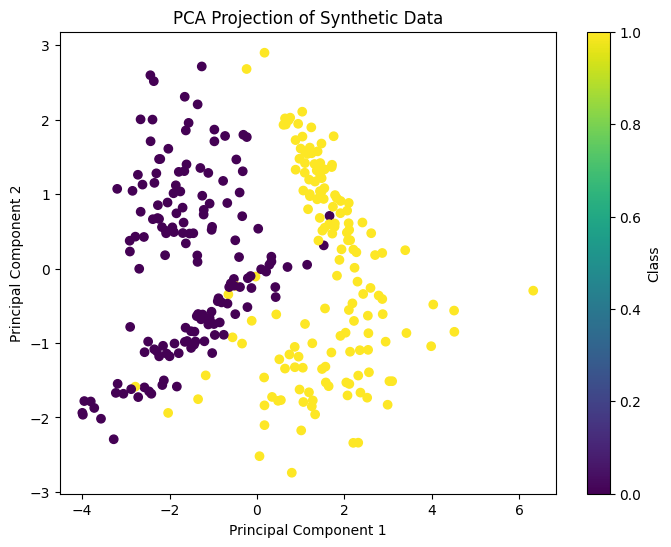

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Застосуємо PCA до зменшення розмірності до 2 ознак
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Відобразимо результат на точковій діаграмі
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Projection of Synthetic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()


Reduced data shape: torch.Size([300, 2])


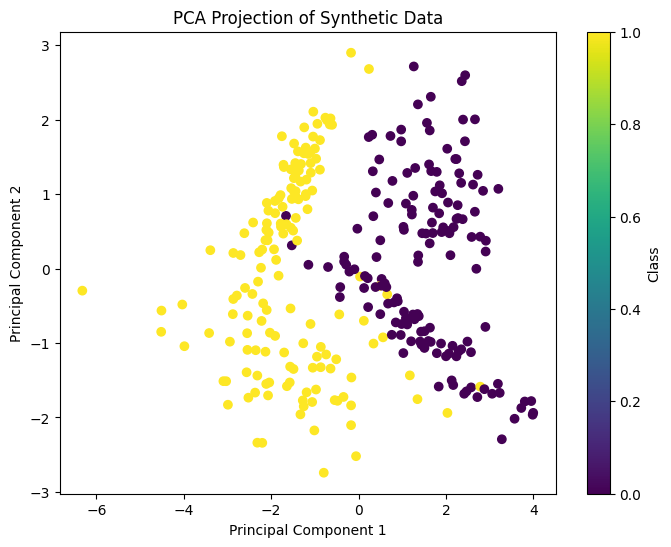

In [ ]:
# Tе саме, але з використанням PyTorch

# Стандартизовуємо дані
mean = torch.mean(X_torch, dim=0)
data_centered = X_torch - mean

# Матриця коваріації
cov_matrix = torch.mm(data_centered.t(), data_centered) / (data_centered.size(0) - 1)

# Власні вектори та власні значення
eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix, UPLO='U')

# Сортуємо
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Вибириємо верхніх k
k = 2
selected_eigenvectors = eigenvectors[:, :k]

# Стиснені дані
data_reduced = torch.mm(data_centered, selected_eigenvectors)

print("Reduced data shape:", data_reduced.shape)


# Відобразимо результат на точковій діаграмі
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced.numpy()[:, 0], data_reduced.numpy()[:, 1], c=y, cmap='viridis')
plt.title('PCA Projection of Synthetic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

##Формування підмножин даних

Виконаємо розбиття на дані для тренування та тестування для об'єктивної оцінки точності побудованих моделей.

In [ ]:
from sklearn.model_selection import train_test_split

# Розділити дані на дані для навчання та тестування зі стратифікацією
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

# X_train, X_test - ознаки для навчання та тестування відповідно
# y_train, y_test - мітки класів для навчання та тестування відповідно

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, random_split

tensor_dataset = TensorDataset(data_reduced, y_torch)

# Define the size of your training and testing subsets
train_size = int(0.8 * len(tensor_dataset))  # 80% for training
test_size = len(tensor_dataset) - train_size  # Remaining 20% for testing

# Use random_split to split the dataset
train_dataset, test_dataset = random_split(tensor_dataset, [train_size, test_size])

print(train_dataset[20])

(tensor([-0.8634, -1.0521], dtype=torch.float64), tensor(1))


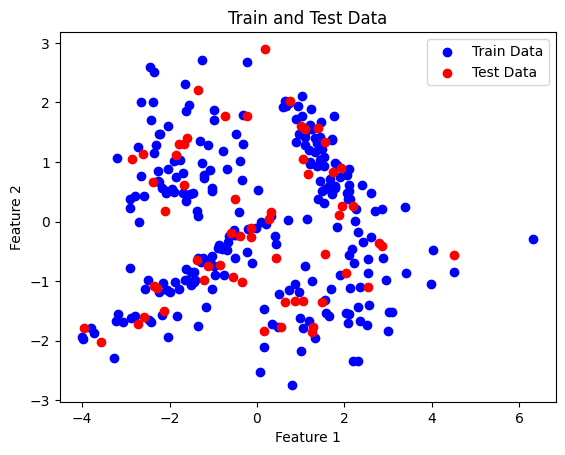

In [ ]:
# Візуалізація даних для тренування
plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', label='Train Data')

# Візуалізація даних для тестування
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', label='Test Data')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Train and Test Data')
plt.legend()
plt.show()

Візуалізуємо розподіл даних для тренування за класами.

<ipython-input-21-462f194ee078>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='Set2')


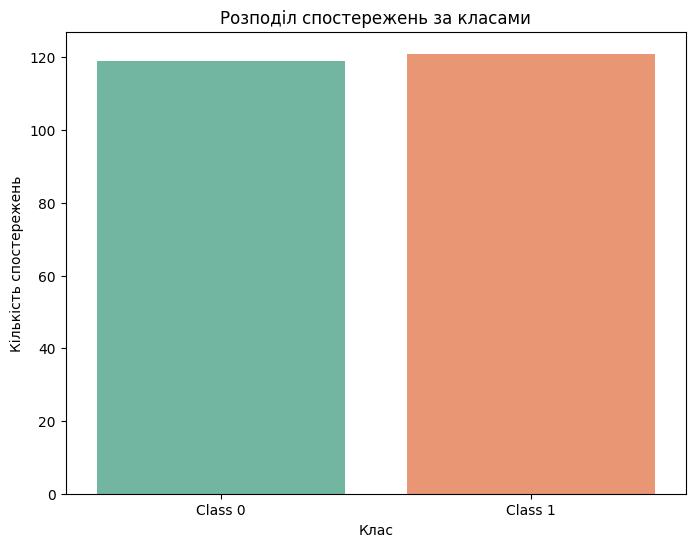

In [ ]:
import seaborn as sns

# Створення списку класів
classes = ['Class 0', 'Class 1']

# Побудова розподілу за класами
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='Set2')
plt.title('Розподіл спостережень за класами')
plt.xlabel('Клас')
plt.ylabel('Кількість спостережень')
plt.xticks(ticks=[0, 1], labels=classes)
plt.show()


Та розподіл тестових даних.

<ipython-input-22-0afebe9346b8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='Set2')


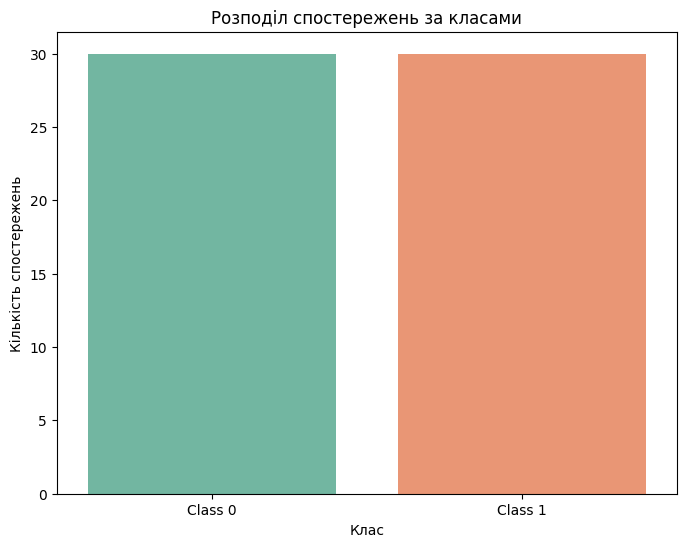

In [ ]:
# Створення списку класів
classes = ['Class 0', 'Class 1']

# Побудова розподілу за класами
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, palette='Set2')
plt.title('Розподіл спостережень за класами')
plt.xlabel('Клас')
plt.ylabel('Кількість спостережень')
plt.xticks(ticks=[0, 1], labels=classes)
plt.show()


Отже, ми переконались, що набори даних збалансовані, тобто мають приблизно однакову кількість спостережень у кожному класі.

##Кластеризація та класифікація

Ваги моделі кластеризації можуть використовуватись для початкового налаштування ваг моделі класифікації, особливо якщо обидві моделі використовують розподіл Гауса. Ось як це може бути зроблено:

1. **Отримання ваг моделі кластеризації**. Після навчання моделі кластеризації, наприклад суміші гаусівських моделей (GMM), ви отримуєте параметри цієї моделі, такі як середні значення, коваріаційні матриці кожного кластера та його ваги.

2. **Початкова ініціалізація ваг моделі класифікації**. Використайте отримані ваги кожного кластера з моделі кластеризації як початкові значення ваг для моделі класифікації, яка також використовує розподіл Гауса.

3. **Навчання моделі класифікації**. Використовуйте початкові ваги, отримані з моделі кластеризації, як початкову точку для навчання моделі класифікації.

4. **Оцінка ефективності**. Після навчання моделі класифікації оцініть її ефективність на тестовому наборі даних для визначення її точності й надійності.

Цей підхід може бути корисним, оскільки ваги моделі кластеризації можуть слугувати гарною початковою точкою для ваг моделі класифікації, особливо якщо обидві моделі використовують схожий розподіл Гауса. Однак важливо враховувати, що ефективність такого підходу може залежати від специфіки даних і завдання класифікації.

Спробуємо проініціалізувати таким чином класифікатор Баєса.

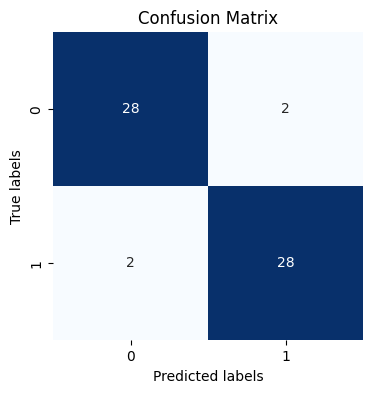

F1 score: 0.9333333333333333


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Навчання моделі суміші гаусівських моделей (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_train)

# Отримання ваг моделі GMM (ваги кожного кластера)
initial_weights = gmm.weights_

# Початкова ініціалізація ваг моделі класифікації (Gaussian Naive Bayes)
# gnb = GaussianNB(priors=initial_weights)


gnb = GaussianNB()

# Навчання моделі класифікації
gnb.fit(X_train, y_train)

# Прогнозування на тестовому наборі даних
y_pred = gnb.predict(X_test)

# Розрахунок матриці плутанини
cm = confusion_matrix(y_test, y_pred)

# Візуалізація матриці плутанини
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Обчислимо метрику F1
f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)


##Метод градієнтного спуску та класифікація



Epoch [10/100], Loss: 0.6786
Epoch [20/100], Loss: 0.6632
Epoch [30/100], Loss: 0.6485
Epoch [40/100], Loss: 0.6346
Epoch [50/100], Loss: 0.6213
Epoch [60/100], Loss: 0.6086
Epoch [70/100], Loss: 0.5966
Epoch [80/100], Loss: 0.5851
Epoch [90/100], Loss: 0.5742
Epoch [100/100], Loss: 0.5638


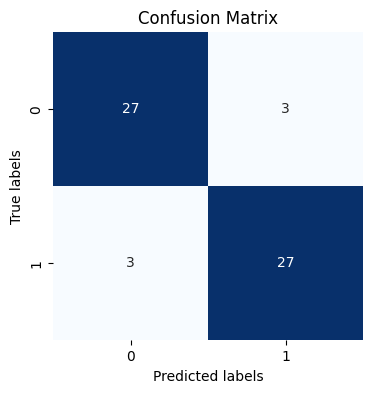

F1 score: 0.9


In [ ]:
import numpy as np

# Оголошуємо функцію логістичної активації
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Оголошуємо функцію втрат - бінарна хрест-ентропія
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Функція для тренування моделі логістичної регресії
def logistic_regression_train(X_train, y_train, learning_rate=0.01, num_epochs=100):
    num_features = X_train.shape[1]
    num_samples = X_train.shape[0]

    # Ініціалізуємо ваги та зсув
    weights = np.zeros((num_features,))
    bias = 0

    # Навчання моделі
    for epoch in range(num_epochs):
        # Обчислюємо ваговану суму з використанням векторизації
        linear_model = np.dot(X_train, weights) + bias

        # Обчислюємо ймовірності, застосовуючи логістичну функцію активації
        y_pred = sigmoid(linear_model)

        # Обчислюємо градієнти за допомогою похідних бінарної хрест-ентропії
        dw = (1 / num_samples) * np.dot(X_train.T, (y_pred - y_train))
        db = (1 / num_samples) * np.sum(y_pred - y_train)

        # Оновлюємо параметри
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Обчислюємо втрати для відстеження прогресу
        loss = binary_cross_entropy(y_train, y_pred)

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

    return weights, bias

# Функція для тестування моделі логістичної регресії
def logistic_regression_predict(X_test, weights, bias):
    linear_model = np.dot(X_test, weights) + bias
    y_pred = sigmoid(linear_model)
    return y_pred.round()


# Нормалізуємо дані
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

# Навчання моделі
weights, bias = logistic_regression_train(X_train, y_train, learning_rate=0.01, num_epochs=100)

# Тестування моделі
y_pred = logistic_regression_predict(X_test, weights, bias)

# Розрахунок матриці плутанини
cm = confusion_matrix(y_test, y_pred)

# Візуалізація матриці плутанини
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Обчислимо метрику F1
f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)



##Генетичний алгоритм і класифікація

Налаштування параметрів моделі може відбуватися не тільки класичними методами оптимізації, як, наприклад, метод градієнтного спуску. Для цієї задачі використаємо генетичний алгоритм оптимізації ваг логістичної регресії.

In [ ]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Best solution (weights): (array([ 4.14861684, -0.59571635]), 0.9291666666666667, 0)
[ 4.14861684 -0.59571635]
Accuracy on test set: 0.9


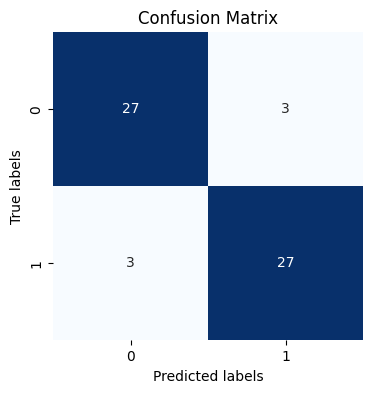

F1 score: 0.9


In [ ]:
import numpy as np
import pygad
from sklearn.metrics import accuracy_score

def fitness_function(ga_instance, solution, solution_idx):
    h = 1 / (1 + np.exp(-np.dot(X_train, solution)))
    predictions = (h >= 0.5).astype(int)
    accuracy = accuracy_score(y_train, predictions)
    return accuracy

# Розмірність даних
num_samples_train = 240
num_features = 2

# # Генерація синтетичних даних для навчання
# X_train = np.random.rand(num_samples_train, num_features)
# y_train = np.random.randint(0, 2, num_samples_train)

num_generations=10
population_size=30
num_features = X_train.shape[1]

ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=10,
                        fitness_func=fitness_function,
                        sol_per_pop=population_size,
                        num_genes=num_features)

ga_instance.run()

best_solution = ga_instance.best_solution()

# Отримання найкращих параметрів моделі
print("Best solution (weights):", best_solution)

best_weights = best_solution[0]

print(best_weights)

def predict_logistic_regression(X_test, weights):
    predictions = 1 / (1 + np.exp(-np.dot(X_test, weights)))
    predictions = (predictions >= 0.5).astype(int)
    return predictions

# Прогнозування на тестових даних з використанням отриманих ваг
predictions = predict_logistic_regression(X_test, best_weights)

# Оцінка точності моделі
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test set:", accuracy)

# Розрахунок матриці плутанини
cm = confusion_matrix(y_test, predictions)

# Візуалізація матриці плутанини
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


# Обчислимо метрику F1
f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)


# Додаткові матеріали

1. Логістична регресія: https://youtube.com/playlist?list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe&si=7HNFtB4QdQ755HFv
2. Оптимізатори: https://youtu.be/NE88eqLngkg?si=0gI450w-oJcLiMl8
3. https://wellsr.com/python/logistic-regression-from-scratch-in-python/
4. https://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/
5. https://www.geeksforgeeks.org/computational-graph-in-pytorch/
6. https://zachcolinwolpe.medium.com/pytorchs-dynamic-graphs-autograd-96ecb3efc158
7. По лінійній регресії (assumptions of regression). Для більш повного висвітлення:
8. https://ethanweed.github.io/pythonbook/05.04-regression.html
9. https://towardsai.net/p/l/how-to-verify-the-assumptions-of-linear-regression
10. Pytorch: https://deeplearning.neuromatch.io/tutorials/W1D1_BasicsAndPytorch/student/W1D1_Tutorial1.html